Border Crossing Entry Data - Exploratory Data Analysis

The dataset was downloaded from Kaggle website: https://www.kaggle.com/datasets/akhilv11/border-crossing-entry-data

<span style="color:yellow; font-size:20px;">1. Import all necessary libraries and load the dataset into a pandas DataFrame.</span>


In [881]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

In [882]:
# Load the CSV file
df = pd.read_csv('Border_Crossing_Entry_Data.csv')

<span style="color:yellow;font-size:20px;">2. Verifying data structures and data types. Handle missing values and duplicates.</span>


In [883]:
# Display the first few rows of the data to see the data structure
df.head(10)

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
5,Madawaska,Maine,109,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,179,POINT (-68.3271 47.35446)
6,Pembina,North Dakota,3401,US-Canada Border,03/01/2019 12:00:00 AM,Bus Passengers,1054,POINT (-97.24333 48.96639)
7,Progreso,Texas,2309,US-Mexico Border,03/01/2019 12:00:00 AM,Truck Containers Empty,1808,POINT (-97.94889 26.061670000000003)
8,Portal,North Dakota,3403,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Empty,6685,POINT (-102.54917 48.99583)
9,Champlain-Rouses Point,New York,712,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,24759,POINT (-73.44694 44.98639)


In [884]:
# Display the shape of the dataframe
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 346733
Total number of columns: 8


In [885]:
# Display the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  346733 non-null  object
 1   State      346733 non-null  object
 2   Port Code  346733 non-null  int64 
 3   Border     346733 non-null  object
 4   Date       346733 non-null  object
 5   Measure    346733 non-null  object
 6   Value      346733 non-null  int64 
 7   Location   346733 non-null  object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [886]:
# Check for missing values
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Location     0
dtype: int64

In [887]:
# Check for duplicates
if df.duplicated().sum() > 0:
    print("There are duplicates in the data.")
else:
    print("There are no duplicates in the data.")

There are no duplicates in the data.


In [888]:
# Split the 'Location' column into 'Longitude' and 'Latitude' columns
df['Longitude'] = df['Location'].apply(lambda x: float(x.split('(')[-1].split()[0]))
df['Latitude'] = df['Location'].apply(lambda x: float(x.split(' ')[-1].replace(')', '')))

In [889]:
# Drop the 'Location' column form the dataframe
df.drop(['Location'], axis=1,inplace=True)

In [890]:
#Remove ' Border ' word from the 'Border' column
df['Border'] = df['Border'].str.replace(' Border', '')

In [891]:
#Check if the "Location" column has been replaced by "Longitude" and "Latitude" and ' Border' word from the 'Border' column
df.head(10)

,Port Name,State,Port Code,Border,Date,Measure,Value,Longitude,Latitude
0,Calexico East,California,2507,US-Mexico,03/01/2019 12:00:00 AM,Trucks,34447,-115.48433,32.67524
1,Van Buren,Maine,108,US-Canada,03/01/2019 12:00:00 AM,Rail Containers Full,428,-67.94271,47.16207
2,Otay Mesa,California,2506,US-Mexico,03/01/2019 12:00:00 AM,Trucks,81217,-117.05333,32.57333
3,Nogales,Arizona,2604,US-Mexico,03/01/2019 12:00:00 AM,Trains,62,-110.93361,31.34028
4,Trout River,New York,715,US-Canada,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,-73.44253,44.99001
5,Madawaska,Maine,109,US-Canada,03/01/2019 12:00:00 AM,Trucks,179,-68.32710,47.35446
6,Pembina,North Dakota,3401,US-Canada,03/01/2019 12:00:00 AM,Bus Passengers,1054,-97.24333,48.96639
7,Progreso,Texas,2309,US-Mexico,03/01/2019 12:00:00 AM,Truck Containers Empty,1808,-97.94889,26.06167
8,Portal,North Dakota,3403,US-Canada,03/01/2019 12:00:00 AM,Rail Containers Empty,6685,-102.54917,48.99583
9,Champlain-Rouses Point,New York,712,US-Canada,03/01/2019 12:00:00 AM,Trucks,24759,-73.44694,44.98639


<span style="color:yellow; font-size:20px;">3. Data Analysis and Visualization.</span>

In [892]:
# Conver date from string to date format and check date range
df['Date'] = pd.to_datetime(df['Date'])
earliest_date=df['Date'].min().strftime('%m/%d/%Y')
latest_date=df['Date'].max().strftime('%m/%d/%Y')
print(f"Data range from: {earliest_date}")
print(f"Data range to: {latest_date}")

Data range from: 01/01/1996
Data range to: 03/01/2019


/var/folders/0g/jfvflb395b17x51gk8q945nr0000gn/T/ipykernel_20700/1732987053.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [893]:
# Check how many uique States are in the dataframe
unique_state_mexico = df[df['Border'] == 'US-Mexico'][['State', 'Border']].drop_duplicates().sort_values(by='State')
unique_state_canada = df[df['Border'] == 'US-Canada'][['State', 'Border']].drop_duplicates().sort_values(by='State')

print(f"Total number of unique states for US-Mexico: {len(unique_state_mexico)}")
print(unique_state_mexico)

print(f"\nTotal number of unique states for US-Canada: {len(unique_state_canada)}")
print(unique_state_canada)


Total number of unique states for US-Mexico: 4
         State     Border
3      Arizona  US-Mexico
0   California  US-Mexico
74  New Mexico  US-Mexico
7        Texas  US-Mexico

Total number of unique states for US-Canada: 11
             State     Border
80          Alaska  US-Canada
29           Idaho  US-Canada
1            Maine  US-Canada
38        Michigan  US-Canada
12       Minnesota  US-Canada
10         Montana  US-Canada
4         New York  US-Canada
6     North Dakota  US-Canada
5014          Ohio  US-Canada
13         Vermont  US-Canada
17      Washington  US-Canada


In [894]:
#Check how many unique Ports are in the dataframe - only for US-Mexico
unique_port_mexico = df[df['Border'] == 'US-Mexico'][['Port Name', 'Border']].drop_duplicates().sort_values(by='Port Name')

print(f"Total number of unique ports for US-Mexico: {len(unique_port_mexico)}")
print(unique_port_mexico)




Total number of unique ports for US-Mexico: 27
               Port Name     Border
192              Andrade  US-Mexico
34             Boquillas  US-Mexico
255          Brownsville  US-Mexico
89              Calexico  US-Mexico
0          Calexico East  US-Mexico
253             Columbus  US-Mexico
439  Cross Border Xpress  US-Mexico
44               Del Rio  US-Mexico
66               Douglas  US-Mexico
136           Eagle Pass  US-Mexico
153              El Paso  US-Mexico
193              Hidalgo  US-Mexico
317               Laredo  US-Mexico
78             Lukeville  US-Mexico
33                  Naco  US-Mexico
3                Nogales  US-Mexico
2              Otay Mesa  US-Mexico
269             Presidio  US-Mexico
7               Progreso  US-Mexico
42       Rio Grande City  US-Mexico
32                  Roma  US-Mexico
157             San Luis  US-Mexico
19            San Ysidro  US-Mexico
74          Santa Teresa  US-Mexico
45                Sasabe  US-Mexico
28               

In [895]:
#Check how many unique Ports are in the dataframe - only for US-Canada
unique_port_canada = df[df['Border'] == 'US-Canada'][['Port Name', 'Border']].drop_duplicates().sort_values(by='Port Name')

print(f"\nTotal number of unique ports for US-Canada: {len(unique_port_canada)}")
print(unique_port_canada)


Total number of unique ports for US-Canada: 89
                         Port Name     Border
337                          Alcan  US-Canada
135                 Alexandria Bay  US-Canada
773                        Algonac  US-Canada
113                        Ambrose  US-Canada
295                      Anacortes  US-Canada
39                          Antler  US-Canada
114803                  Bar Harbor  US-Canada
84                        Baudette  US-Canada
21                   Beecher Falls  US-Canada
65                          Blaine  US-Canada
121                       Boundary  US-Canada
73                     Bridgewater  US-Canada
88           Buffalo-Niagara Falls  US-Canada
22                          Calais  US-Canada
4212                  Cape Vincent  US-Canada
139                        Carbury  US-Canada
9           Champlain-Rouses Point  US-Canada
366                   Dalton Cache  US-Canada
161                       Danville  US-Canada
50                      Del Boni

<function matplotlib.pyplot.show(close=None, block=None)>

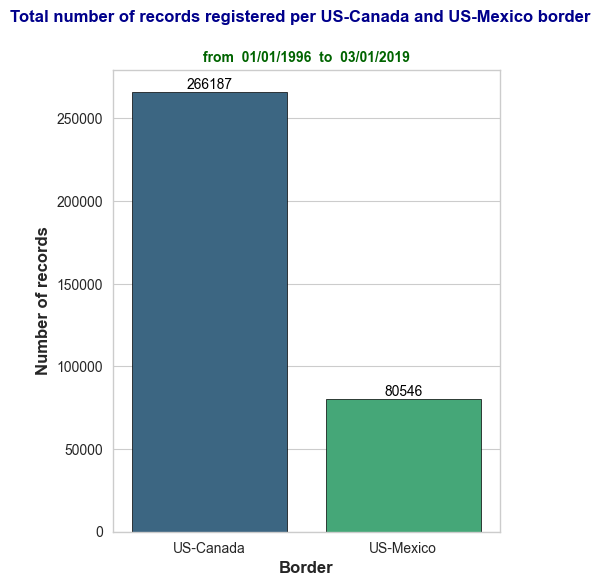

In [896]:
#Chart 1.1: Total number of records registered per US-Canada and US-Mexico border from 1996-01-01 to 2019-01-03
plt.figure(figsize=(5, 6))
sns.set_style('whitegrid')
sns.barplot(x=df['Border'].value_counts().index,y=df['Border'].value_counts().values,palette='viridis',edgecolor='black',hue=df['Border'].value_counts().index)

for i, v in enumerate(df['Border'].value_counts().values):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.xlabel('Border', fontweight='bold')
plt.ylabel('Number of records', fontweight='bold')
plt.suptitle('Total number of records registered per US-Canada and US-Mexico border',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.show

<span style="color:lime; font-size:16px;">The total number of records registered at the US-Canada border is more than three times higher than at the US-Mexico border (based on the data from 01/01/1996 till 03/01/2019). In the case of Canada, 266,187 records were registered, while for Mexico, the number is only 80,546. This is, of course, due to the number of available ports, with 89 ports along the Canadian border compared to 27 along the Mexican border. Now let's see what it looks like in terms of the number of people crossing the border.</span>

<function matplotlib.pyplot.show(close=None, block=None)>

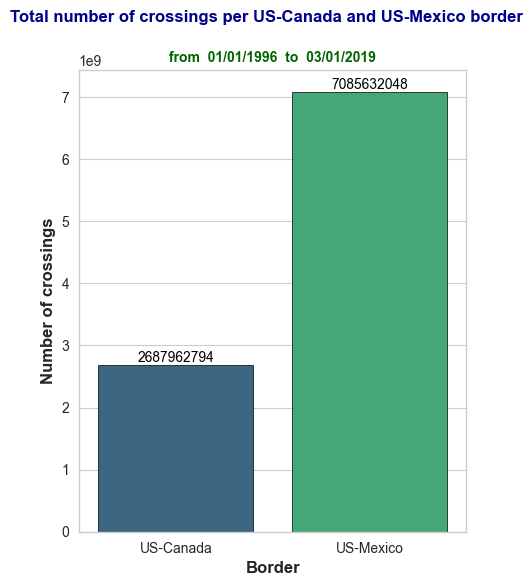

In [897]:
#Chart 1.2: Total number of crossings per US-Canada and US-Mexico border from 1996-01 to 2019-03
plt.figure(figsize=(5, 6))
sns.set_style('whitegrid')
sns.barplot(x=df['Border'].value_counts().index,y=df.groupby('Border')['Value'].sum().values,palette='viridis',edgecolor='black',hue=df['Border'].value_counts().index)

for i, v in enumerate(df.groupby('Border')['Value'].sum().values):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.xlabel('Border', fontweight='bold')
plt.ylabel('Number of crossings', fontweight='bold')
plt.suptitle('Total number of crossings per US-Canada and US-Mexico border',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.show

<span style="color:lime; font-size:16px;">The situation is completely different when it comes to the number of people crossing the border. Here, significantly more people crossed the US-Mexico border than the US-Canada border, with 7,085,632,048 compared to 2,687,962,794, despite the fact that the number of ports on the US-Mexico border is much smaller. Let's check now how the data is distributed for individual years and months.</span>

In [898]:
#create a function to add year and month columns to the dataframe ( based on 'Date' column)
def add_year_month_column(df):

    df['Year'] = df['Date'].apply(lambda x: x.year)

    month_mapping={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                   7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

    df['Month'] = df['Date'].apply(lambda x: x.month).map(month_mapping)

    del month_mapping

    return df


df = add_year_month_column(df)
df.sample(10)

,Port Name,State,Port Code,Border,Date,Measure,Value,Longitude,Latitude,Year,Month
188095,Roosville,Montana,3318,US-Canada,2006-06-01,Trucks,1699,-115.06,49.00,2006,Jun
151063,Progreso,Texas,2309,US-Mexico,2008-09-01,Truck Containers Empty,2213,-97.95,26.06,2008,Sep
136005,Ambrose,North Dakota,3410,US-Canada,2009-09-01,Bus Passengers,0,-103.49,49.00,2009,Sep
43695,Brownsville,Texas,2301,US-Mexico,2015-06-01,Buses,590,-97.50,25.89,2015,Jun
273258,Raymond,Montana,3301,US-Canada,2000-12-01,Truck Containers Full,1316,-104.57,49.00,2000,Dec
323932,Highgate Springs-Alburg,Vermont,212,US-Canada,1997-07-01,Train Passengers,0,-73.09,45.02,1997,Jul
235951,Walhalla,North Dakota,3407,US-Canada,2003-06-01,Personal Vehicles,2596,-97.91,49.00,2003,Jun
83544,Fort Kent,Maine,110,US-Canada,2012-12-01,Truck Containers Full,245,-68.60,47.25,2012,Dec
46887,Willow Creek,Montana,3325,US-Canada,2015-04-01,Truck Containers Empty,0,-109.73,49.00,2015,Apr
122183,Hannah,North Dakota,3408,US-Canada,2010-07-01,Bus Passengers,0,-98.69,49.00,2010,Jul


In [899]:
#Create temporary dataframe for charts
df_tmp=df.groupby(['Year','Border'])['Value'].sum().reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

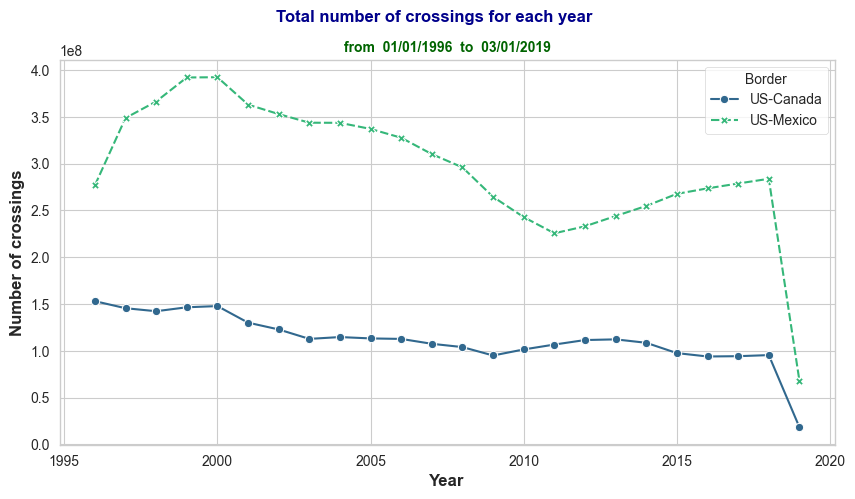

In [900]:
#Chart 2.1: Total number of crossings for each year

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year',y='Value',data=df_tmp,style='Border',hue='Border',errorbar=None,markers=True,palette='viridis')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of crossings', fontweight='bold')
plt.suptitle('Total number of crossings for each year',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.show

<span style="color:lime; font-size:16px;">US-Mexico: the years from 1996 to 2000 saw an increase in the number of people crossing the border, after that period until 2011 there was a significant decrease. After 2011 we can see another increase in the number of people crossing the border, but not as big as in the years 1996-2000. In the years 1999 and 2000 the highest number of border crossings was recorded, while the lowest in 2011.</span>

<span style="color:lime; font-size:16px;">US-Canada: In 1996 the highest number of border crossings was recorded, since then the number has slowly decreased and it can be said that from 2003 to 2018 it is at a similar level. The lowest values ​​were in 2016 and 2017. </span>

<span style="color:lime; font-size:16px;">Now let's see how it relates to months. </span>

In [901]:
#Create temporary dataframe for charts
df_tmp=df.groupby(['Border','Month','Year'])['Value'].sum().reset_index()
df_temp_avg=df_tmp.groupby(['Border','Month'])['Value'].mean().reset_index()

In [902]:
#Print temporary dataframe
print(df_temp_avg.sort_values(by='Value',ascending=False))

       Border Month         Value
14  US-Mexico   Dec  2.701069e+07
19  US-Mexico   Mar  2.651338e+07
17  US-Mexico   Jul  2.609033e+07
20  US-Mexico   May  2.603347e+07
13  US-Mexico   Aug  2.599309e+07
12  US-Mexico   Apr  2.541324e+07
16  US-Mexico   Jan  2.525840e+07
22  US-Mexico   Oct  2.513124e+07
21  US-Mexico   Nov  2.499232e+07
18  US-Mexico   Jun  2.497741e+07
23  US-Mexico   Sep  2.412067e+07
15  US-Mexico   Feb  2.327386e+07
1   US-Canada   Aug  1.327389e+07
5   US-Canada   Jul  1.283246e+07
6   US-Canada   Jun  1.062936e+07
11  US-Canada   Sep  1.018355e+07
8   US-Canada   May  1.005617e+07
10  US-Canada   Oct  9.543427e+06
0   US-Canada   Apr  8.833694e+06
7   US-Canada   Mar  8.773229e+06
9   US-Canada   Nov  8.478425e+06
2   US-Canada   Dec  8.289107e+06
4   US-Canada   Jan  7.562987e+06
3   US-Canada   Feb  7.380500e+06


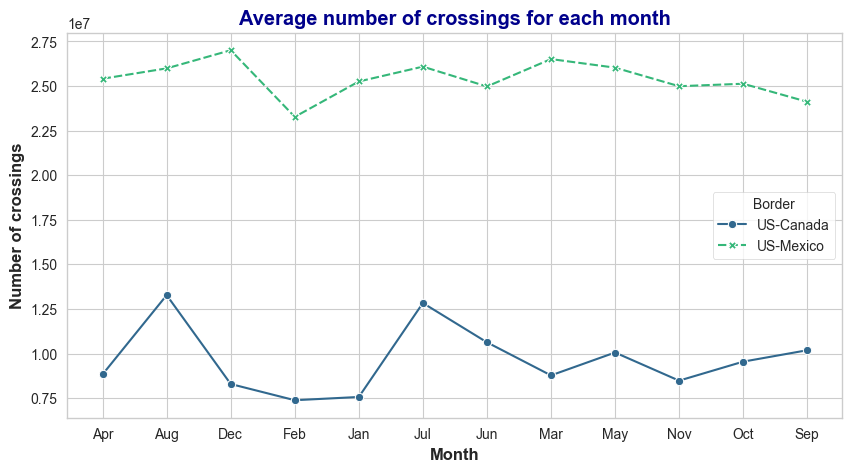

In [903]:
#Chart 2.2: Average number of crossings for each month

plt.figure(figsize=(10, 5))
sns.lineplot(x='Month',y='Value',data=df_temp_avg,style='Border',hue='Border',errorbar=None,markers=True,palette='viridis')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of crossings', fontweight='bold')
plt.title('Average number of crossings for each month',fontweight='bold',color='darkblue')
plt.show()

<span style="color:lime; font-size:16px;">US-Mexico: The month with the highest number of border crossings recorded is December.</span>

<span style="color:lime; font-size:16px;">US-Canada: The two standout months with the highest number of border crossings recorded are July and August.</span>

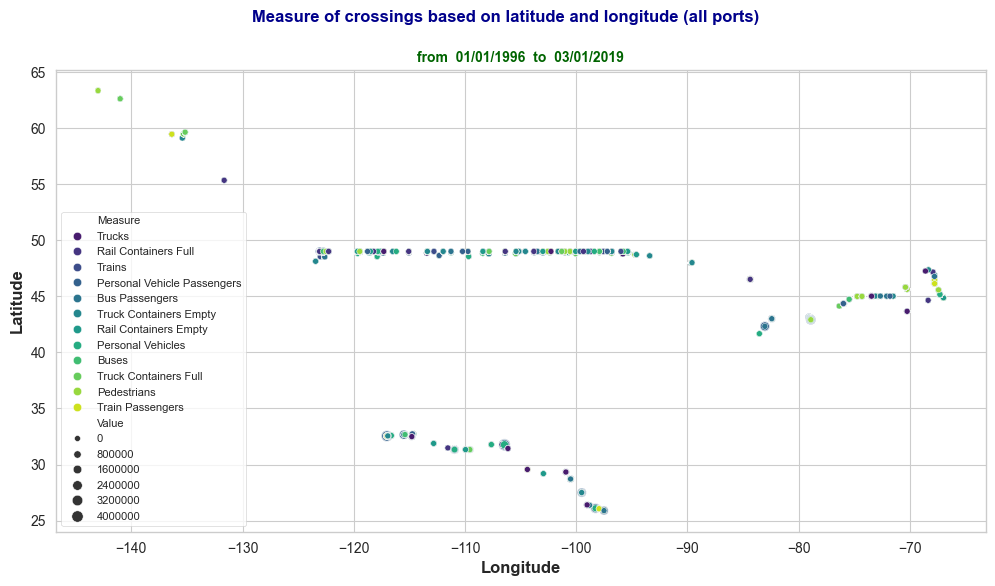

In [904]:
#Chart 3.1: Scater plot chart latitude and longitude

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude',y='Latitude',data=df,size='Value',hue='Measure',palette='viridis')
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.suptitle('Measure of crossings based on latitude and longitude (all ports)',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.legend(fontsize=8)
plt.show()

<span style="color:lime; font-size:16px;">Using longitude and latitude, we can see how ports are located on the borders with Canada and Mexico. Additionally, measures are marked with colors but it is not legible, so let's see how it will look on a bar chart.</span>

In [905]:
#Create temporary dataframe for charts
df_tmp=df.groupby(['Measure'])['Value'].sum().sort_values(ascending=False).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

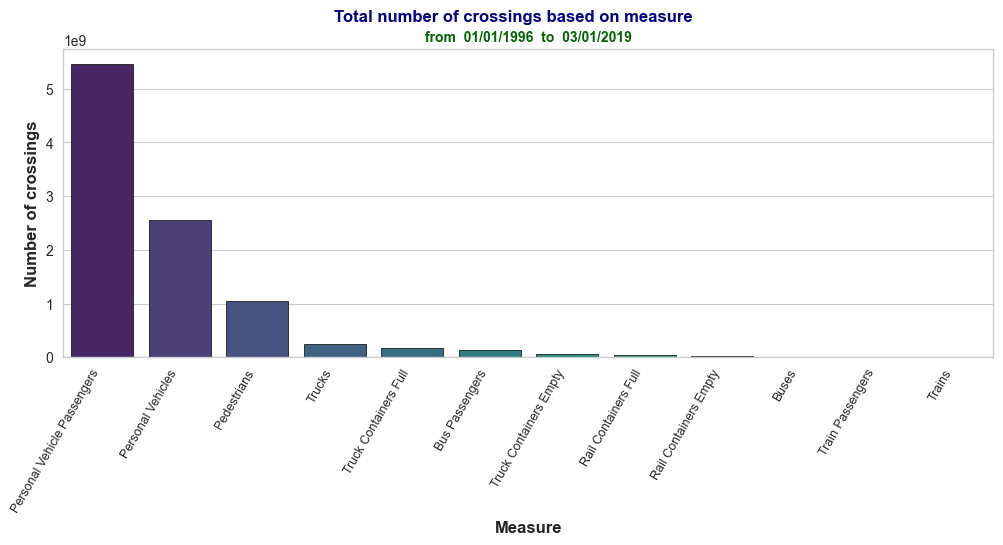

In [906]:
#Chart 4.1: Bar chart for all Measure

plt.figure(figsize=(12,4))

sns.barplot(x='Measure',y='Value',data=df_tmp,
            palette='viridis',edgecolor='black',hue=df['Measure'].value_counts().index,legend=False)

plt.xlabel('Measure', fontweight='bold')
plt.xticks(rotation=60,fontsize=9,ha='right')
plt.ylabel('Number of crossings', fontweight='bold')
plt.suptitle('Total number of crossings based on measure',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.show

<span style="color:lime; font-size:16px;">When it comes to Measure, one group stands out above all else: "Personal Vehicle Passenger" and it accounts for over 50% of border crossings across the entire population. By far the fewest people cross the border using 'Trains', 'Train Passengers and Buses. Let's see how this plays out on a pie chart</span>

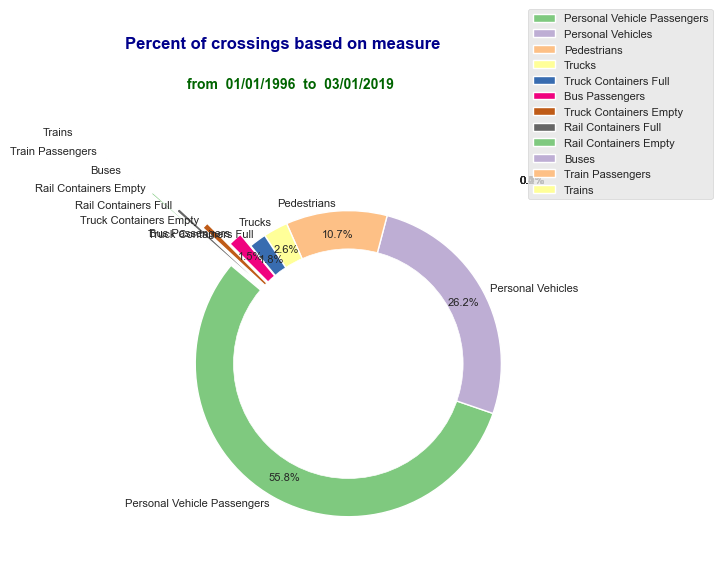

In [907]:
#Chart 4.2: Percent of crossings based on measure
explode = [0, 0, 0, 0, 0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]

plt.figure(figsize=(6,6))
plt.style.use('ggplot')

wedges, texts, autotexts = plt.pie(
    x=df_tmp['Value'], 
    labels=df_tmp['Measure'], 
    autopct='%1.1f%%', 
    textprops={'fontsize': 8}, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'w'}, 
    explode=explode, 
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.05,
    colors=sns.color_palette('Accent', 12),
)


for i, text in enumerate(autotexts):
    if float(text.get_text()[:-1]) < 1: # labels only for measure >1%
        text.set_position((1.2, 1.2))
        plt.annotate(f"{df_tmp['Measure'].iloc[i]} ({text.get_text()})", 
                     xy=text.get_position(), 
                     xytext=(1.4, 1.4),
                     arrowprops=dict(facecolor='black', shrink=0.05))


circle = plt.Circle((0, 0), 0.75, color='white')
plt.gca().add_artist(circle)
plt.suptitle('Percent of crossings based on measure', fontweight='bold', color='darkblue', fontsize=12)
plt.title(f"from  {earliest_date}  to  {latest_date}", fontweight='bold', color='darkgreen', fontsize=10)
plt.legend(wedges, df_tmp['Measure'], fontsize=8, loc='upper left', bbox_to_anchor=(1, 1.2))
plt.axis('equal')
plt.show()

<span style="color:lime; font-size:16px;">More than half, as much as 55.8% , are 'Personal Vehicle Passengers'. Now let's analyze what the situation looks like in the states.</span>

In [908]:
#Create temporary dataframe for charts
df_tmp=df.groupby(['State','Border'])['Value'].sum().sort_values(ascending=False).reset_index()

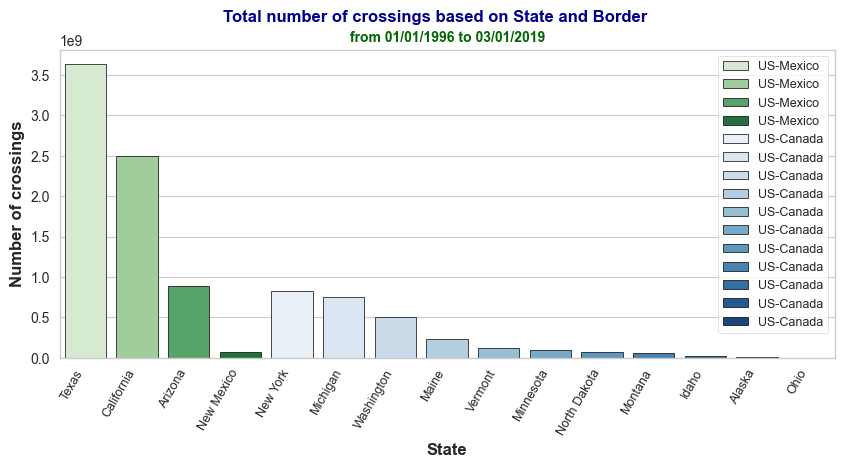

In [909]:
#Chart 5.1: Total number of crossings based on State and Border

# Conditions
condition_1 = (df_tmp['Border'] == 'US-Canada')
condition_2 = (df_tmp['Border'] == 'US-Mexico')

plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')
#US-Mexico
sns.barplot(x='State', y='Value', data=df_tmp.loc[condition_2],
            palette='Greens', edgecolor='black', label='US-Mexico',hue='State')
#US-Canada
sns.barplot(x='State', y='Value', data=df_tmp.loc[condition_1],
            palette='Blues', edgecolor='black', label='US-Canada',hue='State')

plt.xlabel('State', fontweight='bold')
plt.xticks(rotation=60, fontsize=9, ha='right')
plt.ylabel('Number of crossings', fontweight='bold')
plt.suptitle('Total number of crossings based on State and Border', fontweight='bold', color='darkblue')
plt.title(f"from {earliest_date} to {latest_date}", fontweight='bold', color='darkgreen', fontsize=10)
plt.legend(loc='upper right', fontsize=9)

plt.show()

<span style="color:lime; font-size:16px;">In the case of the Mexico border, the state with the highest number of border crossings is Texas, while for the Canada border, it is New York. Now let's check the individual ports</span>

In [910]:
#Create temporary dataframe for charts
df_tmp=df.groupby(['Port Name','Border'])['Value'].sum().sort_values(ascending=False).reset_index()

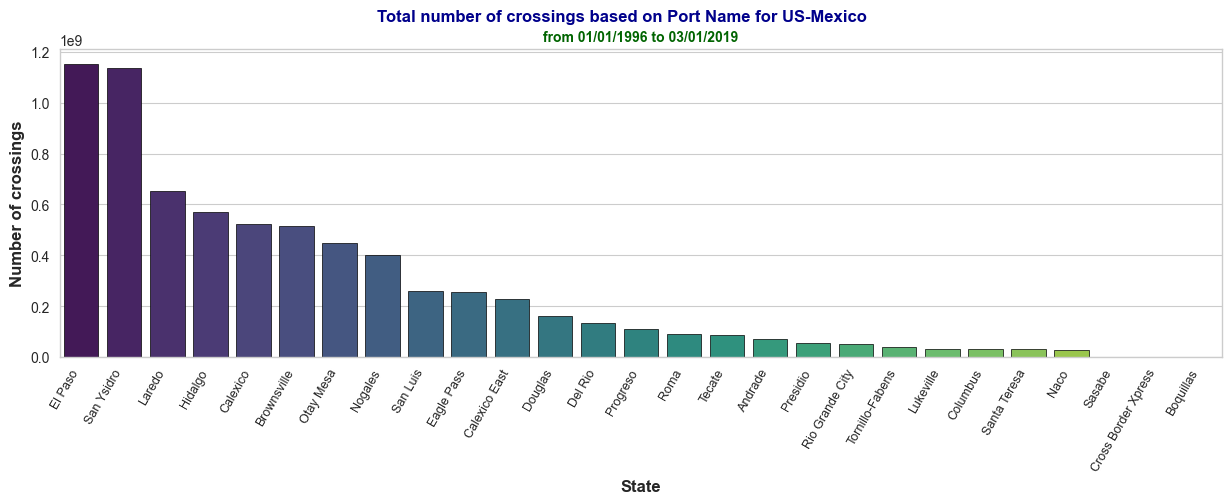

In [911]:
#Chart 5.2: Total number of crossings based on Port Name for US-Mexico

# Conditions
condition_1 = (df_tmp['Border'] == 'US-Mexico')

plt.figure(figsize=(15, 4))

#US-Mexico
sns.barplot(x='Port Name', y='Value', data=df_tmp.loc[condition_1],
            palette='viridis', edgecolor='black', label='US-Mexico',hue='Port Name',legend=False)

plt.xlabel('State', fontweight='bold')
plt.xticks(rotation=60, fontsize=9, ha='right')
plt.ylabel('Number of crossings', fontweight='bold')
plt.suptitle('Total number of crossings based on Port Name for US-Mexico', fontweight='bold', color='darkblue')
plt.title(f"from {earliest_date} to {latest_date}", fontweight='bold', color='darkgreen', fontsize=10)

plt.show()

<span style="color:lime; font-size:16px;">When it comes to the Mexican border, two ports stand out: 'El Paso' and 'San Ysidro'</span>

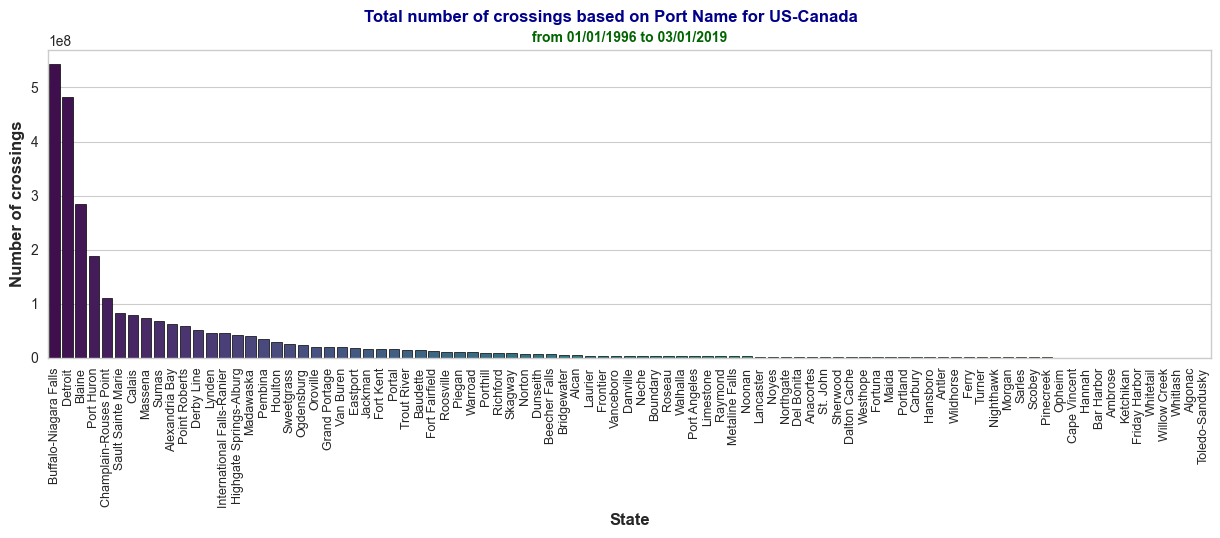

In [912]:
#Chart 5.2: Total number of crossings based on Port Name for US-Canada

# Conditions
condition_1 = (df_tmp['Border'] == 'US-Canada')

plt.figure(figsize=(15, 4))

#US-Mexico
sns.barplot(x='Port Name', y='Value', data=df_tmp.loc[condition_1],
            palette='viridis', edgecolor='black', label='US-Canada',hue='Port Name',legend=False)

plt.xlabel('State', fontweight='bold')
plt.xticks(rotation=90, fontsize=9)
plt.ylabel('Number of crossings', fontweight='bold')
plt.suptitle('Total number of crossings based on Port Name for US-Canada', fontweight='bold', color='darkblue')
plt.title(f"from {earliest_date} to {latest_date}", fontweight='bold', color='darkgreen', fontsize=10)

plt.show()

<span style="color:lime; font-size:16px;">When it comes to the border with Canada, two ports stand out here, Buffalo-Niagara Falls and Detroit. Let us now see what the individual states look like over time.</span>

In [913]:
#Create temporary dataframe for charts
df_tmp=df.groupby(['Year','State'])['Value'].sum().reset_index()

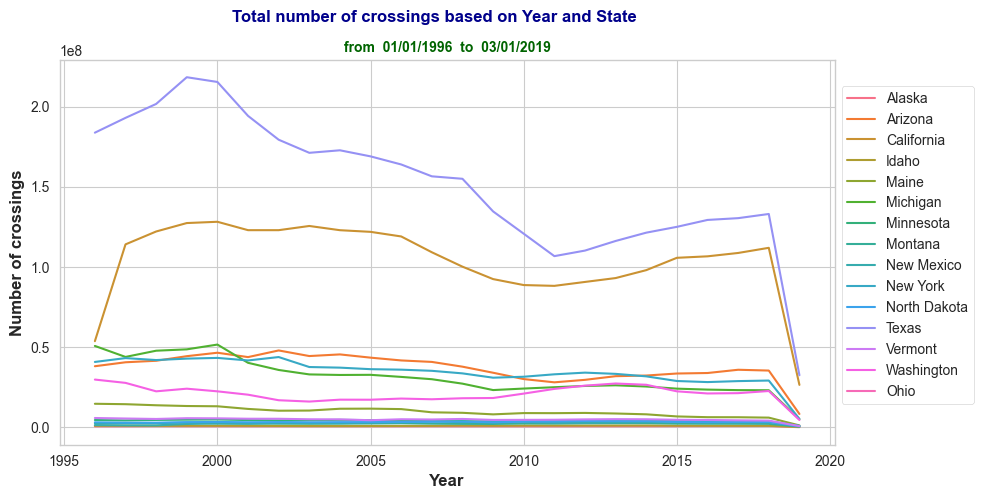

In [914]:
#Chart 5.3: Total number of crossings based on Year and State

plt.figure(figsize=(10, 5))

sns.lineplot(x='Year',y='Value',data=df_tmp,hue='State')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of crossings', fontweight='bold')
plt.suptitle('Total number of crossings based on Year and State',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)

plt.legend(bbox_to_anchor=(1, 0.95), loc='upper left')

plt.show()

<span style="color:lime; font-size:16px;">Texas and California are two states that definitely stand out from the others, their lines are very similar. From 1996 to 2000 we have growth, then declines until 2011. After 2011 we can already see an upward trend.</span>

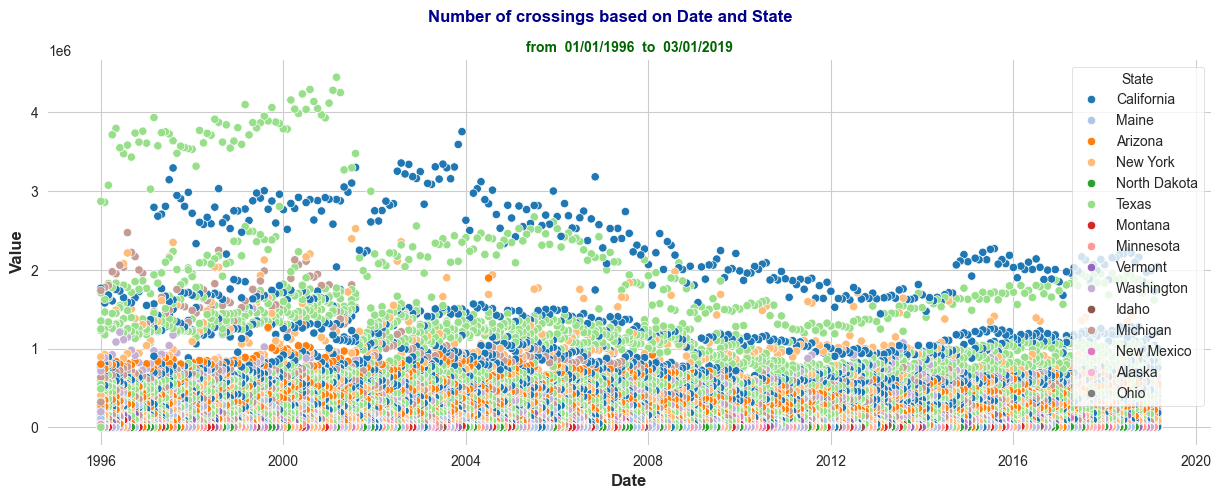

In [915]:
#Chart 5.4: Number of crossings based on Date and State
plt.subplots(figsize=(15, 5))
sns.despine(left=True, bottom=True)

sns.scatterplot(x='Date', y='Value', data=df, hue='State', palette='tab20')

plt.suptitle('Number of crossings based on Date and State',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.show()

<span style="color:lime; font-size:16px;">The chart shows that states like Texas and California have consistently higher crossing volumes compared to other states. The trend over the years shows steady growth in some states and occasional spikes. There is a clear distribution of points across the time axis, with fewer noticeable gaps. However, some periods appear denser with more frequent data points, indicating more frequent recordings or events. I will now prepare a year over year chart to see the percentage changes in border crossings over the available years.</span>

In [916]:
#Create temporary dataframe for charts
df_tmp = df.groupby(['Year', 'Border'])['Value'].sum().reset_index()
df_tmp = df_tmp[df_tmp['Year'] != 2019]
df_canada = df_tmp[df_tmp['Border'] == 'US-Canada']
df_mexico = df_tmp[df_tmp['Border'] == 'US-Mexico']
df_total = df_tmp.groupby('Year')['Value'].sum().reset_index()
df_canada['pct_change'] = df_canada['Value'].pct_change() * 100
df_mexico['pct_change'] = df_mexico['Value'].pct_change() * 100
df_total['pct_change'] = df_total['Value'].pct_change() * 100

/var/folders/0g/jfvflb395b17x51gk8q945nr0000gn/T/ipykernel_20700/821220110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada['pct_change'] = df_canada['Value'].pct_change() * 100
/var/folders/0g/jfvflb395b17x51gk8q945nr0000gn/T/ipykernel_20700/821220110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mexico['pct_change'] = df_mexico['Value'].pct_change() * 100


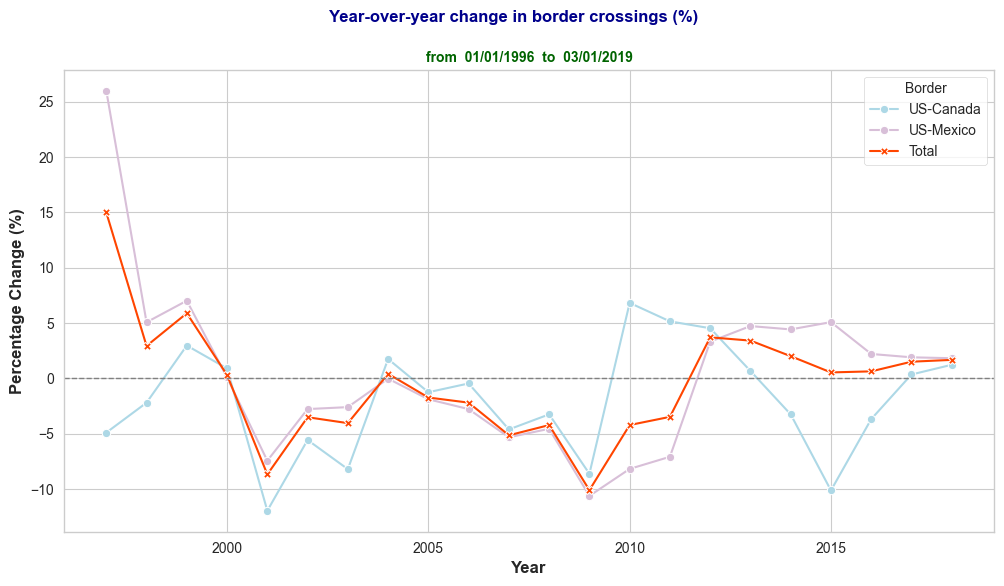

In [917]:
# Chart 6.1: Year-over-year change in border crossings (%)

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='pct_change', data=df_canada, label='US-Canada', marker='o', color='lightblue')
sns.lineplot(x='Year', y='pct_change', data=df_mexico, label='US-Mexico', marker='o', color='thistle')
sns.lineplot(x='Year', y='pct_change', data=df_total, label='Total', marker='X', color='orangered')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.suptitle('Year-over-year change in border crossings (%)', fontweight='bold', color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Percentage Change (%)', fontweight='bold')
plt.legend(title='Border', loc='upper right')
plt.show()

<span style="color:lime; font-size:16px;">The graph shows the year-to-year fluctuations in the percentage change in border crossings for each border and the total combined.
The US-Canada border (light blue) and US-Mexico border (light purple) have unique patterns, but there is a noticeable alignment in trends for all borders around certain years.US-Mexico (purple) starts with a sharp spike in percentage change, reaching about 25% in the late 1990s, followed by a steep decline.
Similarly, the US-Canada (light blue) border crossings show a significant drop in percentage change, eventually stabilizing after 2000.
The total crossings (red) follow a similar pattern to both borders, with a peak in the late 1990s and a subsequent decline around the early 2000s.After 2005, there is a period where percentage changes are relatively stable, with minor fluctuations for both borders. During this time, both borders hover around the 0% line, indicating years of minimal change in border crossings. Let's check the border crossing situation for individual states and months.</span>

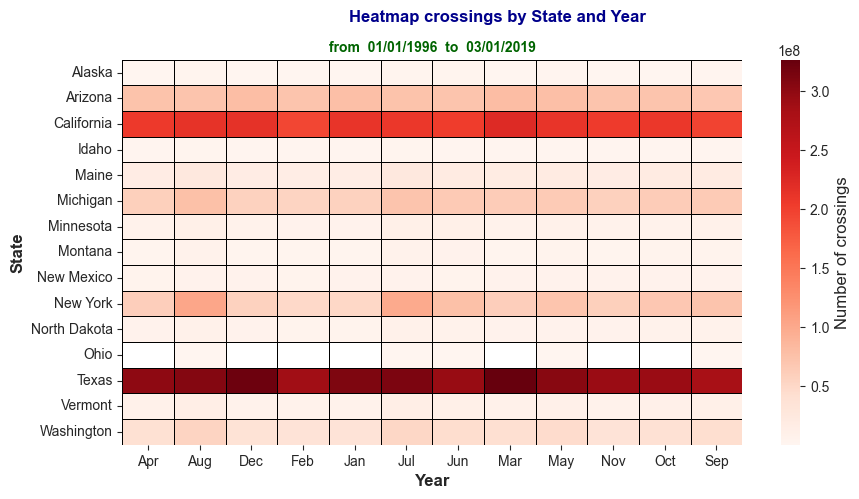

In [918]:
#Chart 7.1: Heatmap crossings by State and Yea
#Create temporary dataframe for charts
df_tmp = df.groupby(['State', 'Month'])['Value'].sum().reset_index()
df_tmp = df_tmp.pivot(index='State', columns='Month', values='Value')

sns.set_style('ticks')
plt.figure(figsize=(10, 5))

sns.heatmap(df_tmp, cmap='Reds',linewidths=.5, linecolor='black',cbar_kws={'label': 'Number of crossings'})

plt.suptitle('Heatmap crossings by State and Year',fontweight='bold',color='darkblue')
plt.title(f"from  {earliest_date}  to  {latest_date}",fontweight='bold',color='darkgreen',fontsize=10)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('State', fontweight='bold')

plt.show()


<span style="color:lime; font-size:16px;">Texas and California will show high intensity of border crossings throughout the year. Also in the case of Arizona the number of border crossings each month is very similar. I will now check the seasons.</span>

In [919]:
# Add season to dataframe based on column Month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in ['Dec', 'Jan', 'Feb'] 
                                 else ('Spring' if x in ['Mar', 'Apr', 'May'] 
                                       else ('Summer' if x in ['Jun', 'Jul', 'Aug'] 
                                             else ('Fall' if x in ['Sep', 'Oct', 'Nov'] 
                                                   else 'Fall'))))

In [920]:
# Check if the "Season" column has been added
df.sample(10)

,Port Name,State,Port Code,Border,Date,Measure,Value,Longitude,Latitude,Year,Month,Season
277846,Columbus,New Mexico,2406,US-Mexico,2000-08-01,Truck Containers Empty,136,-107.63,31.78,2000,Aug,Summer
49507,Highgate Springs-Alburg,Vermont,212,US-Canada,2015-02-01,Rail Containers Full,1337,-73.09,45.02,2015,Feb,Winter
38652,Andrade,California,2502,US-Mexico,2015-10-01,Rail Containers Empty,0,-114.73,32.72,2015,Oct,Fall
224138,International Falls-Ranier,Minnesota,3604,US-Canada,2004-03-01,Pedestrians,1782,-93.40,48.61,2004,Mar,Spring
67750,Norton,Vermont,211,US-Canada,2013-12-01,Personal Vehicles,5435,-71.79,45.01,2013,Dec,Winter
60878,Calexico,California,2503,US-Mexico,2014-05-01,Rail Containers Full,0,-115.50,32.66,2014,May,Spring
84018,Sweetgrass,Montana,3310,US-Canada,2012-12-01,Personal Vehicles,26867,-111.96,49.00,2012,Dec,Winter
252149,Champlain-Rouses Point,New York,712,US-Canada,2002-05-01,Personal Vehicles,90056,-73.45,45.01,2002,May,Spring
237068,Del Bonita,Montana,3322,US-Canada,2003-05-01,Rail Containers Full,0,-112.79,49.00,2003,May,Spring
273105,Walhalla,North Dakota,3407,US-Canada,2000-12-01,Trucks,557,-97.91,49.00,2000,Dec,Winter


In [921]:
#Create temporary dataframe for charts
df_tmp = df.groupby(['Border', 'Season'])['Value'].sum().reset_index()

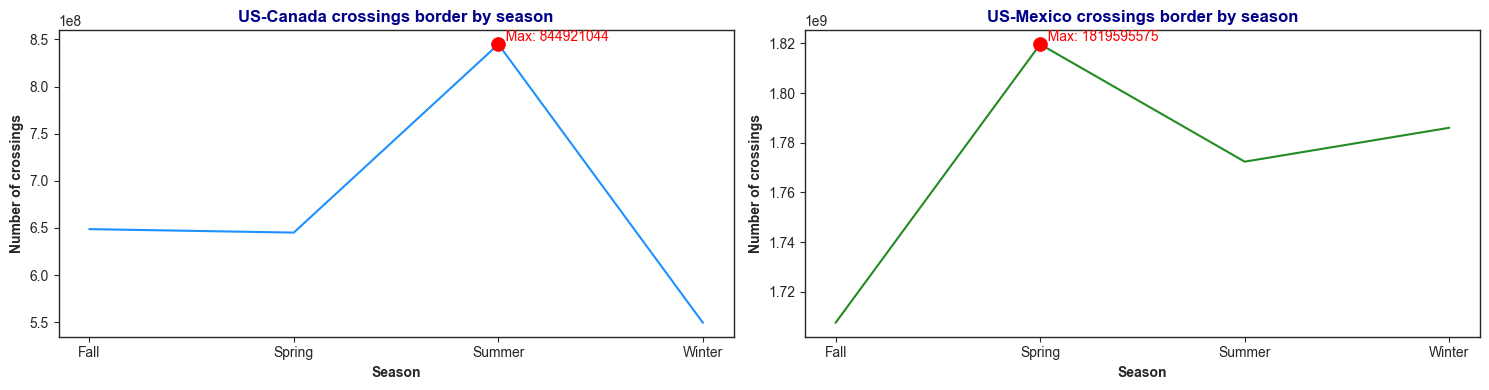

In [922]:
#Chart 8.1: US-Canada crossings border by season
plt.figure(figsize=(15, 4))

# US-Canada
plt.subplot(1, 2, 1)
sns.lineplot(x='Season', y='Value', data=df_tmp[df_tmp['Border'] == 'US-Canada'], color='dodgerblue')
plt.title('US-Canada crossings border by season', fontweight='bold', color='darkblue', fontsize=12)
plt.xlabel('Season', fontweight='bold', fontsize=10)
plt.ylabel('Number of crossings', fontweight='bold', fontsize=10)

# US-Canada max peak
canada_data = df_tmp[df_tmp['Border'] == 'US-Canada']
max_val_canada = canada_data['Value'].max()
max_season_canada = canada_data.loc[canada_data['Value'].idxmax(), 'Season']
plt.scatter(max_season_canada, max_val_canada, color='red', s=100, zorder=5)
plt.text(max_season_canada, max_val_canada, f'  Max: {max_val_canada}', color='red', fontsize=10, va='bottom', ha='left')

# US-Mexico
plt.subplot(1, 2, 2)
sns.lineplot(x='Season', y='Value', data=df_tmp[df_tmp['Border'] == 'US-Mexico'], color='forestgreen')
plt.title('US-Mexico crossings border by season', fontweight='bold', color='darkblue', fontsize=12)
plt.xlabel('Season', fontweight='bold', fontsize=10)
plt.ylabel('Number of crossings', fontweight='bold', fontsize=10)

# US-Mexico max peak
mexico_data = df_tmp[df_tmp['Border'] == 'US-Mexico']
max_val_mexico = mexico_data['Value'].max()
max_season_mexico = mexico_data.loc[mexico_data['Value'].idxmax(), 'Season']
plt.scatter(max_season_mexico, max_val_mexico, color='red', s=100, zorder=5)
plt.text(max_season_mexico, max_val_mexico, f'  Max: {max_val_mexico}', color='red', fontsize=10, va='bottom', ha='left')

plt.tight_layout()
plt.show()


<span style="color:lime; font-size:16px;">In the case of the border with Canada, the largest number of people crossed the border in the summer. In the case of the border with Mexico, it is Spring, although there are not such large differences between all the seasons.</span>

In [923]:
#Create temporary dataframe for charts
df_tmp = df.groupby(['Port Name', 'Month', 'Year'])['Value'].sum().reset_index()
df_tmp = df_tmp.loc[df_tmp['Value'] == 0]
df_tmp= df_tmp.groupby(['Port Name'])['Value'].count().reset_index().sort_values(by='Value', ascending=False)


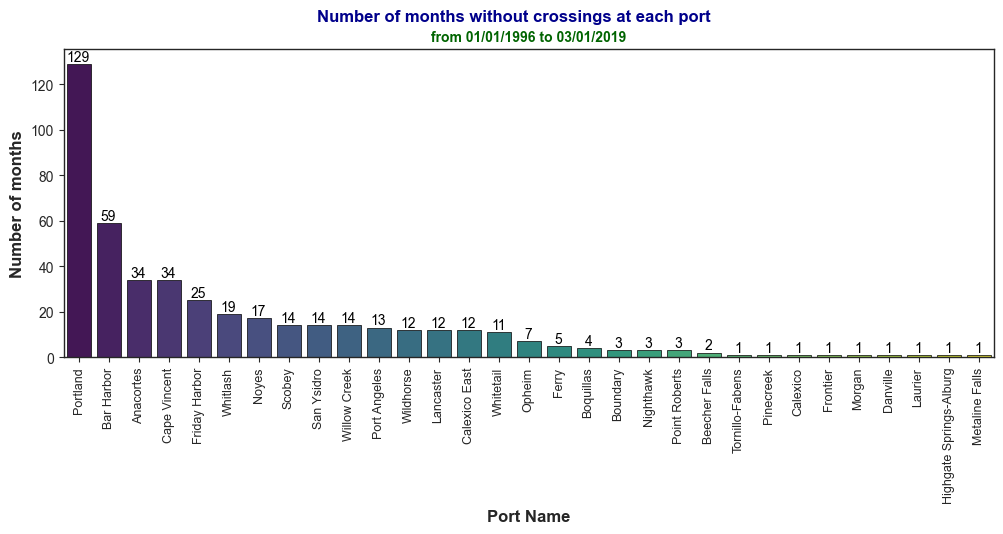

In [924]:
#Chart 9.1: Number of months without crossings at each port.
plt.figure(figsize=(12, 4))

sns.barplot(x='Port Name',y='Value',data=df_tmp,
            palette='viridis',edgecolor='black',hue='Port Name',legend=False)

for i, v in enumerate(df_tmp['Value'].values):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.xlabel('Port Name', fontweight='bold')
plt.xticks(rotation=90,fontsize=9)
plt.ylabel('Number of months', fontweight='bold')
plt.suptitle('Number of months without crossings at each port', fontweight='bold', color='darkblue')
plt.title(f"from {earliest_date} to {latest_date}", fontweight='bold', color='darkgreen', fontsize=10)

plt.show()

<span style="color:lime; font-size:16px;">Interesting fact, the port that recorded the greatest number of months without crossing the border (the number of border crossings was 0 per month) is: 'Portland' - 129 months from January 1996 till March 2019.</span>



<span style="color:yellow; font-size:20px;">4. Summary and conclusions.</span>

<span style="color:lime; font-size:16px;">In analyzing the data from 1996 to 2019 on border crossings at the US-Mexico and US-Canada borders, several significant insights emerged:</span>

<span style="color:lime; font-size:16px;">- The total number of records registered at the US-Canada border was over three times higher than at the US-Mexico border. Specifically, 266,187 records were documented for Canada, while 80,546 records were registered for Mexico.
This discrepancy is mainly due to the larger number of ports on the US-Canada border, with 89 ports compared to 27 ports along the US-Mexico border. However, this does not translate into the number of people crossing the borders. </span>

<span style="color:lime; font-size:16px;">- Despite the smaller number of ports, more people crossed the US-Mexico border—a staggering 7,085,632,048 crossings compared to 2,687,962,794 at the US-Canada border. This highlights the intensity of movement on the southern border.</span>

<span style="color:lime; font-size:16px;">- US-Mexico: From 1996 to 2000, there was a significant increase in border crossings, followed by a sharp decline until 2011. After 2011, there was some recovery, though the crossing numbers did not reach the peaks of the late 1990s.
US-Canada: The highest crossings were recorded in 1996, followed by a gradual decrease. From 2003 to 2018, the crossing numbers remained relatively stable, with the lowest points occurring in 2016 and 2017.</span>

<span style="color:lime; font-size:16px;">- US-Mexico: The busiest month for border crossings is December, likely due to seasonal travel patterns.
US-Canada: The highest crossings were recorded during the summer months, particularly in July and August</span>

<span style="color:lime; font-size:16px;">- Using longitude and latitude data, it is evident that the ports are widely distributed across the US-Mexico and US-Canada borders. For Mexico, the state with the highest number of crossings is Texas, while for Canada, it is New York.
Notable ports include El Paso and San Ysidro on the Mexico border, and Buffalo-Niagara Falls and Detroit on the Canada border.</span>

<span style="color:lime; font-size:16px;">- The "Personal Vehicle Passenger" category accounted for over 50% of all border crossings, dominating the movement data across both borders. Modes of transport such as trains and buses recorded far fewer crossings.</span>

<span style="color:lime; font-size:16px;">- Year-over-year percentage changes in border crossings reveal significant fluctuations. The late 1990s saw sharp increases in crossings, particularly on the US-Mexico border. After 2000, both borders saw declines and then periods of relative stability from 2005 onward.
The US-Canada border experienced more gradual declines, while the US-Mexico border showed more dramatic peaks and troughs.</span>

<span style="color:lime; font-size:16px;"> - An interesting finding was that the Portland port recorded 129 months with zero crossings, highlighting a long period of inactivity between January 1996 and March 2019. </span>

<span style="color:lime; font-size:16px;">This analysis reveals that while the US-Canada border has more ports and records more individual crossings, the US-Mexico border is responsible for the majority of total people crossing the border. Seasonal variations show distinct patterns for both borders, with summer being the busiest period for US-Canada and spring for US-Mexico. The border-crossing landscape has fluctuated significantly over the years, driven by factors such as migration patterns, economic conditions, and geopolitical events.</span>

<span style="color:red; font-size:12px;"><b>Date created: September 2024</b></span>

<span style="color:red; font-size:12px;"><b>Created by: Marcin Szumniak</b></span>